In [5]:
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

import utils

Using TensorFlow backend.


In [6]:
# Read output DF and transform index to datetimeindex
y = pd.read_csv('../data/grendene-cotacao.csv', index_col=0)
y.index = pd.to_datetime(y.index)

# Read inpout DF and transform index to datetimeindex
X = pd.read_csv('../data/grendene-indicadores-financeiros.csv', index_col=0)
X.index = pd.to_datetime(X.index)

In [7]:
# Split indo train / test datesets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


<Figure size 576x432 with 0 Axes>

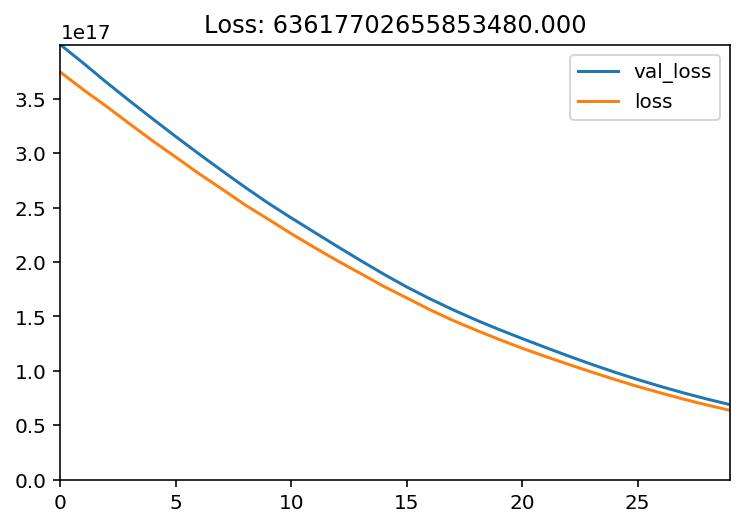

In [8]:
# First model: Linear Regression
linr_model = Sequential()
linr_model.add(Dense(1, input_shape=(X_train.shape[1],)))

linr_model.compile('adam', 'mean_squared_error')
linr_history = linr_model.fit(X_train, y_train, epochs=30, validation_split=0.2, verbose=0)
utils.plot_loss(linr_history)

In [71]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# scale the stock price
ss_price = StandardScaler()
y_train = ss_price.fit_transform(y_train)
y_test = ss_price.transform(y_test)

<Figure size 576x432 with 0 Axes>

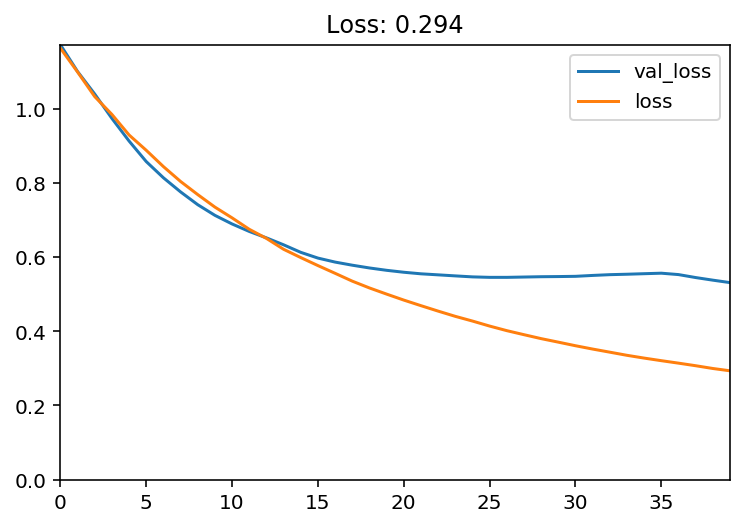

In [72]:
# First model: Linear Regression
linr_model = Sequential()
linr_model.add(Dense(1, input_shape=(X_train.shape[1],)))

linr_model.compile('adam', 'mean_squared_error')
linr_history = linr_model.fit(X_train, y_train, epochs=40, validation_split=0.2, verbose=0)
utils.plot_loss(linr_history)

In [73]:
linr_model.evaluate(X_test, y_test, verbose=0)

0.5285212993621826

In [74]:
# weights data frame
linr_wdf = pd.DataFrame(linr_model.get_weights()[0].T, columns=X.columns).T.sort_values(0, ascending=False)
linr_wdf.columns = ['feature_weight']
linr_wdf.iloc[:,:]

,feature_weight
Fluxo de caixa livre $,0.31
EBIT / Desp Fin Liq x,0.31
Capital Employed $,0.29
EBITDA $,0.28
Alavancagem Financ x,0.28
Divida liq / Ebitda x,0.28
Prazo Med Estoques(dias),0.27
ROIC (IC medio) %,0.26
LAIR + Desp Fin Liq $,0.25
ROE Rent Pat(pat medio)%,0.23


<Figure size 576x432 with 0 Axes>

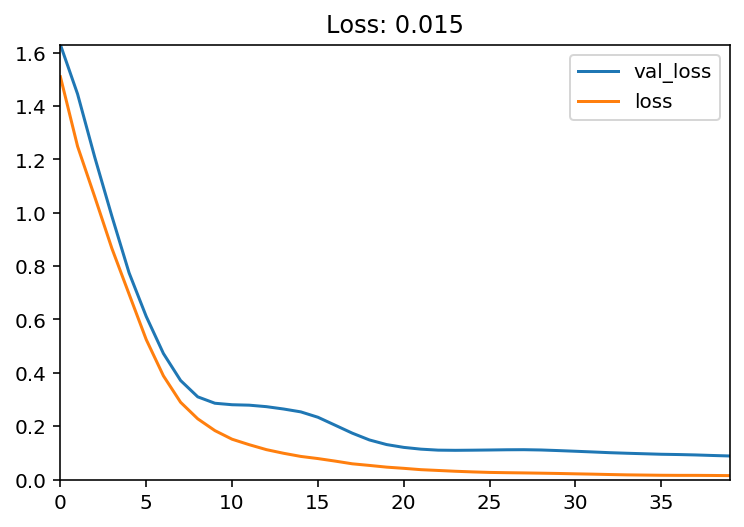

In [75]:
# ANN model
deep_model = Sequential()
deep_model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
deep_model.add(Dense(16, activation='relu'))
deep_model.add(Dense(8, activation='relu'))
deep_model.add(Dense(1))

deep_model.compile('adam', 'mean_squared_error')

deep_history = deep_model.fit(X_train, y_train, epochs=40, validation_split=0.2, verbose=0)
utils.plot_loss(deep_history)

In [76]:
deep_model.evaluate(X_test, y_test, verbose=0)

0.019891269505023956

Epoch 00012: early stopping


<Figure size 576x432 with 0 Axes>

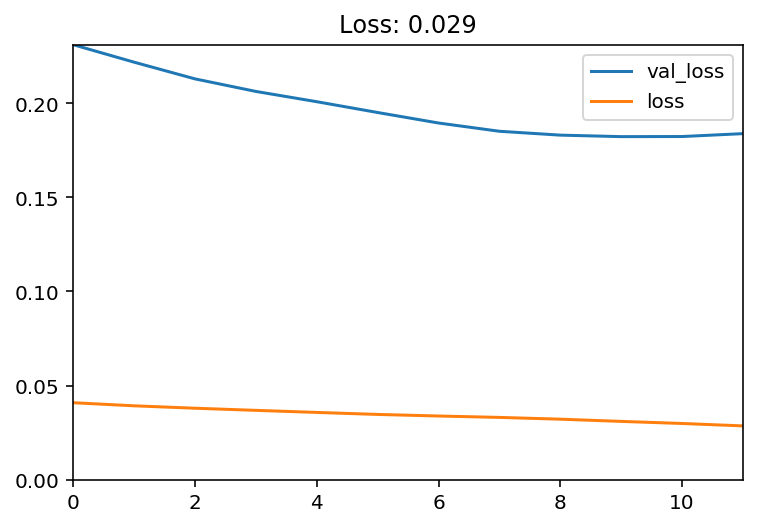

In [59]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
deep_history_early_stop = deep_model.fit(X_train, y_train, epochs=30, validation_split=0.2, 
                              callbacks=[early_stop], verbose=0)
utils.plot_loss(deep_history_early_stop)

In [60]:
deep_model.evaluate(X_test, y_test, verbose=0)

0.12308382987976074

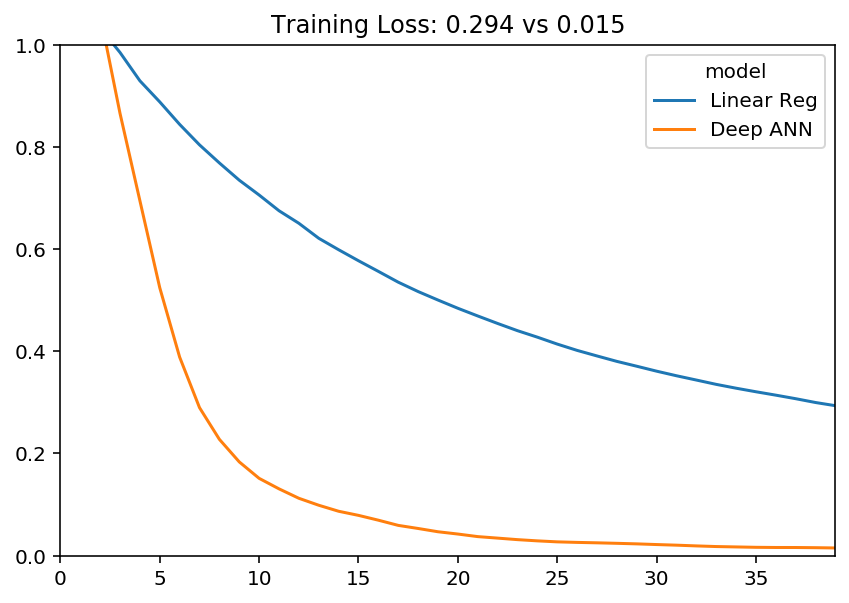

In [77]:
utils.plot_compare_histories([linr_history, deep_history], ['Linear Reg', 'Deep ANN'], plot_accuracy=False)

In [78]:
def output_dollars(num):
    return 'R$'+str("{:,}".format(float(num)))

print('Avarege stock price:', output_dollars(y.mean()))

real_prices = ss_price.inverse_transform(y_test)

# print('Training set house price:', np.mean(ss_price.inverse_transform(y_train)))

train_prices = ss_price.inverse_transform(y_train)
dumb_prices = np.zeros(real_prices.shape)
dumb_prices.fill(train_prices.mean())
dumb_error = mean_absolute_error(real_prices, dumb_prices)
print('Dumb model error:', output_dollars(dumb_error))

linr_predictions = linr_model.predict(X_test).ravel()
linr_prices = ss_price.inverse_transform(linr_predictions)
linr_error = mean_absolute_error(real_prices, linr_prices)
print('Linear model error:', output_dollars(linr_error))

deep_predictions = deep_model.predict(X_test).ravel()
deep_prices = ss_price.inverse_transform(deep_predictions)
deep_error = mean_absolute_error(real_prices, deep_prices)
print('Deep model error:', output_dollars(deep_error))

tdf = pd.DataFrame([['Naive Model', output_dollars(dumb_error)], 
                    ['Linear Regression', output_dollars(linr_error)], 
                    ['Deep ANN', output_dollars(deep_error)]], 
                   columns=['Model', 'Price Error'])
tdf

Avarege stock price: R$3.5973280267072734
Dumb model error: R$1.989307636116942
Linear model error: R$1.1402731457090738
Deep model error: R$0.2857799832355464


,Model,Price Error
0,Naive Model,R$1.989307636116942
1,Linear Regression,R$1.1402731457090738
2,Deep ANN,R$0.2857799832355464


In [79]:
print(r2_score(real_prices, dumb_prices), r2_score(real_prices, linr_prices), r2_score(real_prices, deep_prices))

-0.03302066727781394 0.3236284236505288 0.9745442787224061


In [80]:
def calc_err(a, b):
    return ((100*(b-a)/b)**2)**.5


predictions = deep_model.predict(X_test)
predictions_real = ss_price.inverse_transform(predictions)
stock_real = ss_price.inverse_transform(y_test)

err = []
for i in range(10):
	print('Predicted: %.2f vs %.2f (expected) = %.2f%% error' % (predictions_real[i], stock_real[i], calc_err(predictions_real[i], stock_real[i])))

for i in range(10):
    err.append(calc_err(predictions_real[i], stock_real[i]))

Predicted: 7.01 vs 6.70 (expected) = 4.59% error
Predicted: 3.96 vs 3.89 (expected) = 1.70% error
Predicted: 4.93 vs 4.67 (expected) = 5.51% error
Predicted: 3.04 vs 2.42 (expected) = 25.58% error
Predicted: 0.82 vs 0.80 (expected) = 2.37% error
Predicted: 0.73 vs 0.90 (expected) = 19.31% error
Predicted: 4.37 vs 4.54 (expected) = 3.90% error
Predicted: 5.24 vs 5.21 (expected) = 0.44% error
Predicted: 7.45 vs 7.85 (expected) = 5.02% error
Predicted: 4.48 vs 4.92 (expected) = 9.01% error


In [82]:
train_predictions = deep_model.predict(X_train)
train_predictions = ss_price.inverse_transform(train_predictions)
train_stock = ss_price.inverse_transform(y_train)

for i in range(40):
	print('Predicted: %.2f vs %.2f (expected) = %.2f%% error' % (train_predictions[i], train_stock[i], calc_err(train_predictions[i], train_stock[i])))


Predicted: 0.89 vs 1.04 (expected) = 14.26% error
Predicted: 3.80 vs 3.97 (expected) = 4.36% error
Predicted: 1.90 vs 1.90 (expected) = 0.10% error
Predicted: 4.86 vs 4.86 (expected) = 0.05% error
Predicted: 8.88 vs 8.56 (expected) = 3.83% error
Predicted: 4.41 vs 4.37 (expected) = 0.84% error
Predicted: 0.95 vs 1.25 (expected) = 23.78% error
Predicted: 0.84 vs 1.16 (expected) = 27.50% error
Predicted: 3.27 vs 3.24 (expected) = 0.82% error
Predicted: 3.85 vs 4.46 (expected) = 13.70% error
Predicted: 8.24 vs 7.66 (expected) = 7.56% error
Predicted: 1.92 vs 1.58 (expected) = 21.52% error
Predicted: 8.28 vs 7.98 (expected) = 3.81% error
Predicted: 3.53 vs 3.60 (expected) = 1.79% error
Predicted: 1.47 vs 1.61 (expected) = 8.46% error
Predicted: 0.85 vs 1.41 (expected) = 39.67% error
Predicted: 4.95 vs 5.16 (expected) = 4.13% error
Predicted: 1.60 vs 1.97 (expected) = 18.79% error
Predicted: 7.89 vs 8.16 (expected) = 3.29% error
Predicted: 2.47 vs 1.92 (expected) = 28.82% error
Predicted: 8